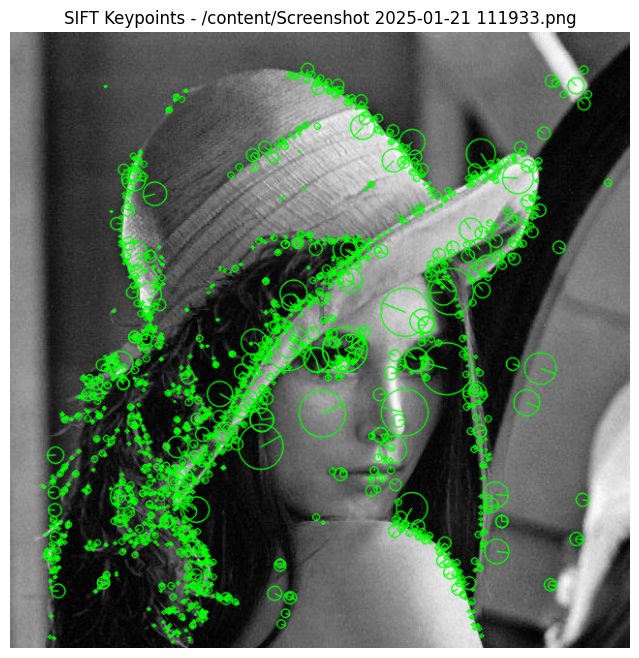

Number of keypoints detected in /content/Screenshot 2025-01-21 111933.png: 2000


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define images and their individual SIFT parameters
images_with_params = [

    {
        "filename": "/content/Screenshot 2025-01-21 111933.png",
        "nfeatures": 2000,
        "contrastThreshold": 0.01,
        "edgeThreshold": 20,
        "sigma": 0.5
    }
]

# Loop through each image with its corresponding parameters
for entry in images_with_params:
    image_file = entry["filename"]
    image = cv2.imread(image_file)

    if image is None:
        print(f"Error loading {image_file}. Skipping.")
        continue

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Create a SIFT detector with image-specific parameters
    sift = cv2.SIFT_create(
        nfeatures=entry["nfeatures"],
        contrastThreshold=entry["contrastThreshold"],
        edgeThreshold=entry["edgeThreshold"],
        sigma=entry["sigma"]
    )

    keypoints, descriptors = sift.detectAndCompute(gray, None)

    image_with_keypoints = cv2.drawKeypoints(
        image, keypoints, None,
        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
        color=(0, 255, 0)
    )

    plt.figure(figsize=(10, 8))
    plt.imshow(image_with_keypoints)
    plt.title(f'SIFT Keypoints - {image_file}')
    plt.axis('off')
    plt.show()

    print(f"Number of keypoints detected in {image_file}: {len(keypoints)}")


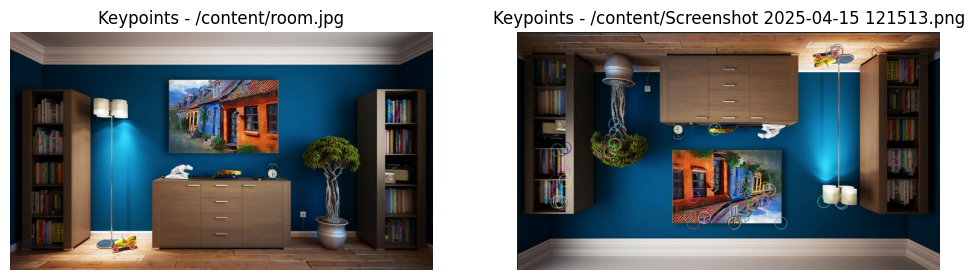

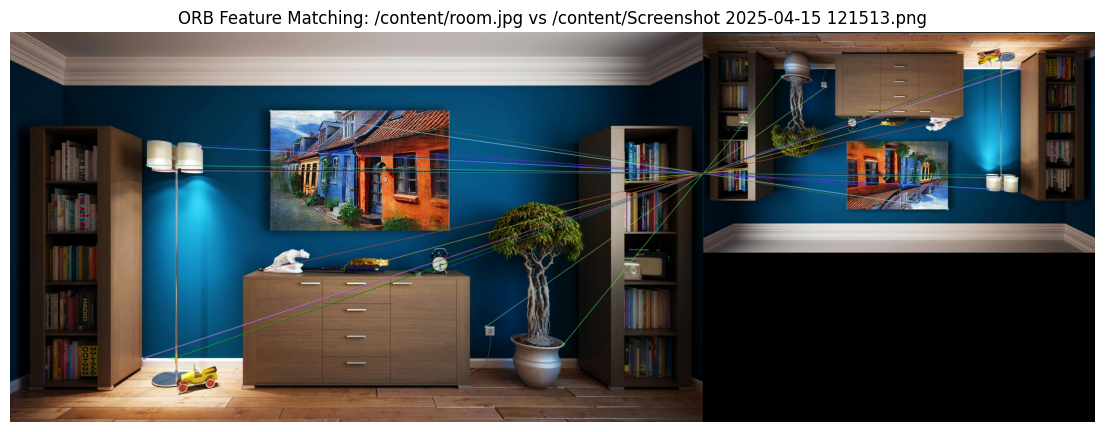

Number of matches between /content/room.jpg and /content/Screenshot 2025-04-15 121513.png: 591


In [ ]:
import cv2
import matplotlib.pyplot as plt

# Define image pairs with their individual ORB parameters
image_pairs_with_params = [
    {
        'img1': '/content/room.jpg',
        'img2': '/content/Screenshot 2025-04-15 121513.png',
        'nfeatures': 1500,
        'scaleFactor': 2,
        'nlevels': 8
    }
]

for pair in image_pairs_with_params:
    img1_file = pair['img1']
    img2_file = pair['img2']

    # Load the images
    img1 = cv2.imread(img1_file)
    img2 = cv2.imread(img2_file)

    if img1 is None or img2 is None:
        print(f"Error loading images: {img1_file}, {img2_file}. Skipping.")
        continue

    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

    # Initialize ORB with custom parameters
    orb = cv2.ORB_create(
        nfeatures=pair['nfeatures'],
        scaleFactor=pair['scaleFactor'],
        nlevels=pair['nlevels']
    )

    # Detect keypoints and descriptors
    kp1, des1 = orb.detectAndCompute(img1, None)
    kp2, des2 = orb.detectAndCompute(img2, None)

    # Draw first 50 keypoints
    img1_kp = cv2.drawKeypoints(img1, kp1[:50], None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
    img2_kp = cv2.drawKeypoints(img2, kp2[:50], None, flags=cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(img1_kp)
    plt.title(f'Keypoints - {img1_file}')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img2_kp)
    plt.title(f'Keypoints - {img2_file}')
    plt.axis('off')
    plt.show()

    # Use Brute-Force Matcher with Hamming distance
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

    # Match descriptors
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)

    # Draw top matches
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:20], None,
                                  flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

    plt.figure(figsize=(14, 6))
    plt.imshow(img_matches)
    plt.title(f'ORB Feature Matching: {img1_file} vs {img2_file}')
    plt.axis('off')
    plt.show()

    print(f"Number of matches between {img1_file} and {img2_file}: {len(matches)}")


Processing room.jpg...


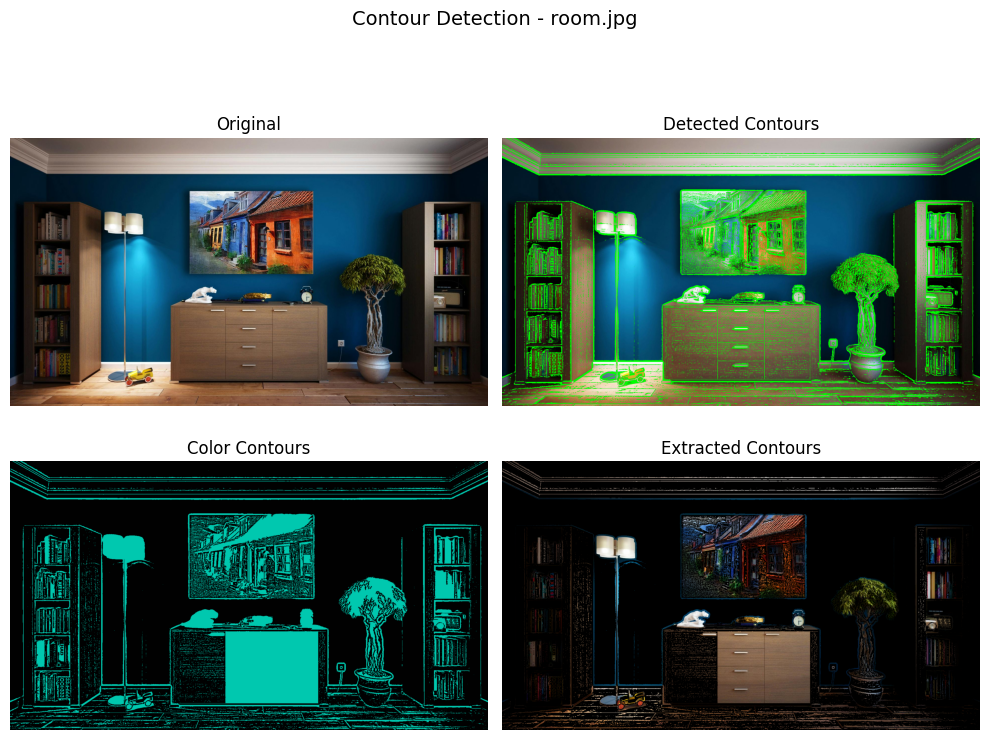

Processing /content/cityyy.jpg...


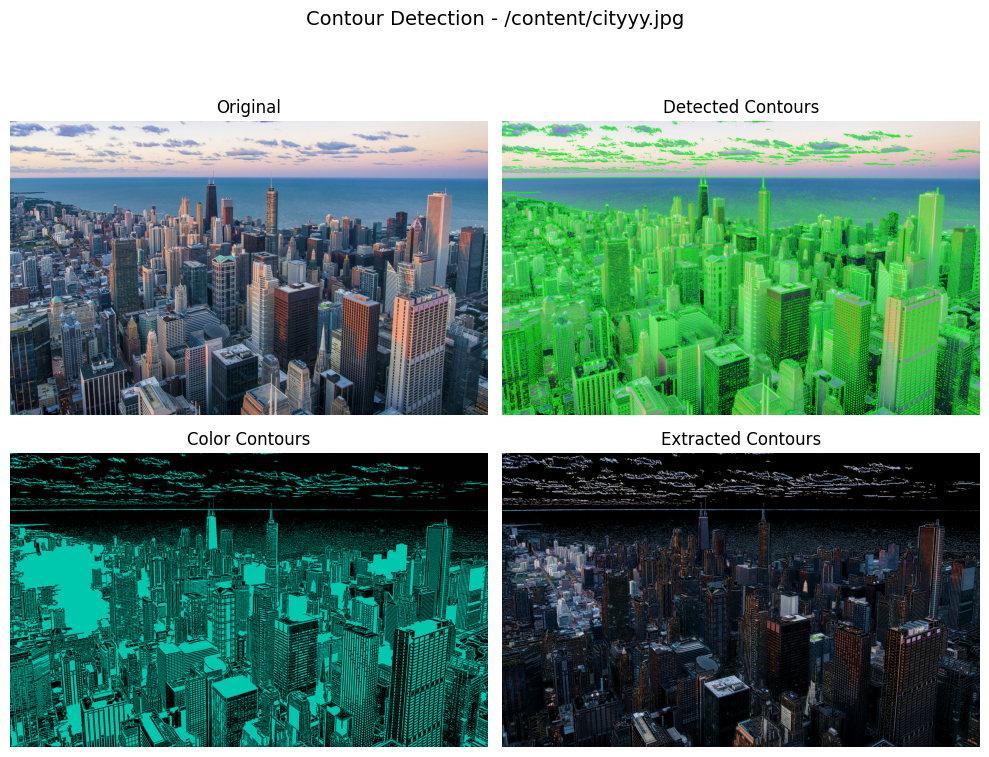

Processing /content/Screenshot 2025-01-21 111933.png...


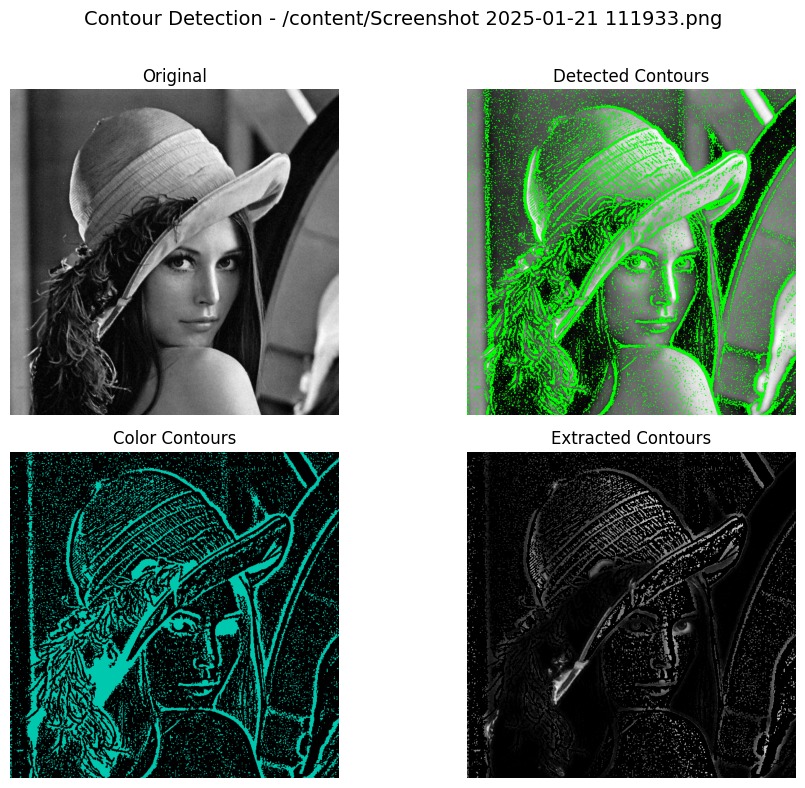

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# List of image files to process
image_files = ['room.jpg','/content/cityyy.jpg','/content/Screenshot 2025-01-21 111933.png']  # Add more as needed

def process_image(file):
    print(f"Processing {file}...")
    img = cv2.imread(file)
    if img is None:
        print(f"Error loading image: {file}")
        return

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Convert to grayscale and apply adaptive threshold
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    thresh = cv2.adaptiveThreshold(
        gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 21, 5)

    # First set of contours (all)
    contours_all, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    detected_contours = img.copy()
    cv2.drawContours(detected_contours, contours_all, -1, (0, 255, 0), -1)

    # Second set of contours (external)
    contours_ext, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Color-filled highlight mask
    highlight = np.ones_like(img)
    cv2.drawContours(highlight, contours_ext, -1, (0, 200, 175), cv2.FILLED)

    # Extract only contour regions from original
    mask = np.zeros_like(img)
    cv2.drawContours(mask, contours_ext, -1, (255, 255, 255), cv2.FILLED)
    foreground = cv2.bitwise_and(img, mask)

    # Display all results
    result_images = {
        "Original": img,
        "Detected Contours": detected_contours,
        "Color Contours": highlight,
        "Extracted Contours": foreground
    }

    plt.figure(figsize=(10, 8))
    for i, (title, image) in enumerate(result_images.items()):
        plt.subplot(2, 2, i + 1)
        plt.imshow(image)
        plt.title(title)
        plt.axis('off')

    plt.suptitle(f"Contour Detection - {file}", fontsize=14)
    plt.tight_layout()
    plt.subplots_adjust(top=0.88)
    plt.show()

# Loop through and process all images
for img_file in image_files:
    process_image(img_file)
